In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

you will need to possess the following to use the code to reporoduce my results :

1) numpy

2) seaborn, matplotlib

3) smt toolbox ( link for download and reference : https://smt.readthedocs.io/en/latest/index.html)

4) sklearn.mixture.BayesianGaussianMixture

5) linear_regression_mixtures.py that has been added with the folder

In [2]:
import pymatreader as pmt 

In [3]:
data = pmt.read_mat('P5e.mat')

In [4]:
data = data['data']

In [5]:
X = data

<AxesSubplot:>

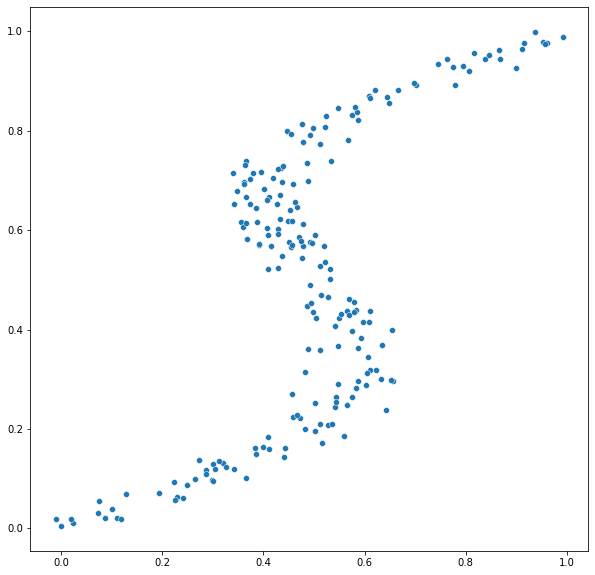

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1])

# using mixture of gaussians to visualise our data better : 

the different coloured points show three different gaussians, but they are given to us in a mixed format. 

In [7]:
from sklearn.mixture import BayesianGaussianMixture

In [8]:
model = BayesianGaussianMixture(n_components=3)

In [9]:
y = model.fit_predict(X)

<AxesSubplot:>

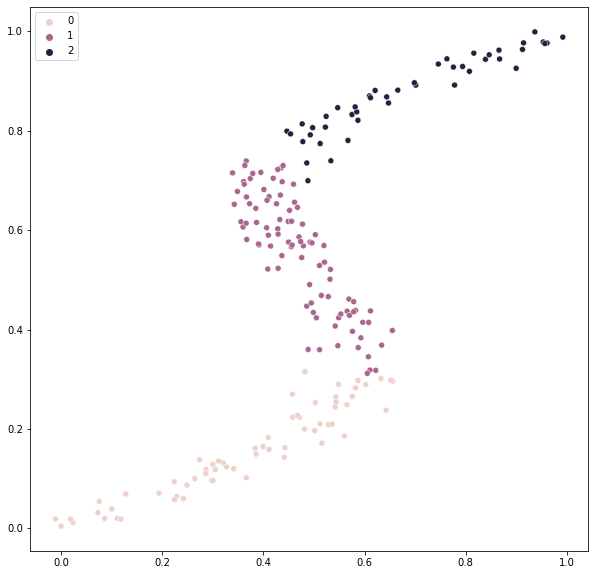

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [11]:
x1 = X[y==0]
x2 = X[y==1]
x3 = X[y==2]

# using a mixture of linear regressions model : 

In [12]:
from linear_regression_mixtures import LinearRegressionsMixture

In [13]:
# model paramters : 

K = 3
epsilon = 1e-5
lam = 0.1
iterations = 5000
random_restarts = 40

In [14]:
# train the model : 

model = LinearRegressionsMixture(np.expand_dims(X[:,0], axis=1), np.expand_dims(X[:,1], axis=1), K=K)
model.train(epsilon=epsilon, lam=lam, iterations=iterations, random_restarts=random_restarts, verbose=False)
print(model)

Random restarts (40/40): [####################] 100% Elapsed time: 0:00:01
Model:        LinearRegressionsMixture (3 components)
Likelihood:   138.3768854486923
Beta:         511.32079491438645
Lambda:       0.1
Pi:           [0.35113206 0.35353147 0.29533647]
Weights norm: [0.7271241162922313, 0.4943909030395538, 1.0274229013905487]
[[ 0.49631451 -0.01553963  0.82181518]
 [ 0.5313957   0.49414662 -0.61661789]]


In [15]:
model.w

array([[ 0.49631451, -0.01553963,  0.82181518],
       [ 0.5313957 ,  0.49414662, -0.61661789]])

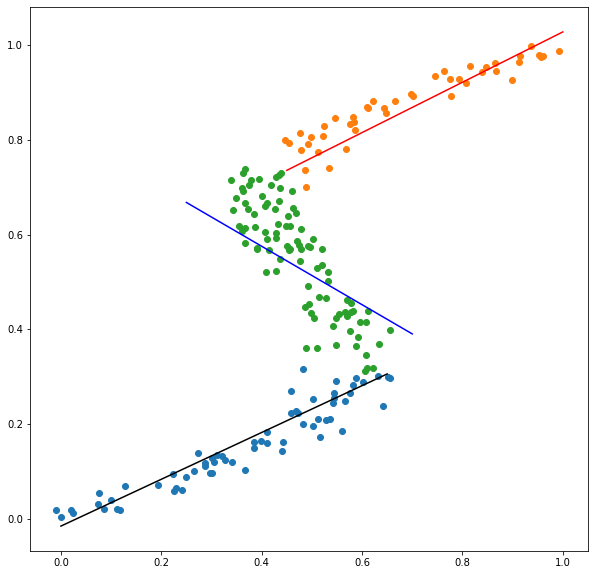

In [18]:
plt.figure(figsize=(10,10))
new = np.linspace(0.45, 1, 5000)
plt.scatter(x1[:,0], x1[:,1])
plt.plot(new, 0.4963145 + (0.53139571*new), 'r')

new = np.linspace(0.25, 0.7, 5000)
plt.scatter(x3[:,0], x3[:,1])
plt.plot(new, 0.82181518 + (-0.6166179*new), 'b')

new = np.linspace(0, 0.65, 5000)
plt.scatter(x2[:,0], x2[:,1])
plt.plot(new, -0.01553963 + (0.49414662*new), 'black')

the above plot clearly shows the three mixed regressions within the data :-) 

this can also be taken as the plot for the predictive mode. this is the submission for part (b) to problem 5E 

# using the smt toolbox to plot the predictive mean :

In [19]:
from smt.applications import MOE

In [20]:
model = MOE(smooth_recombination=True, n_clusters=3, deny=["RMTB", "KPLSK"])

In [21]:
model.set_training_values(np.expand_dims(X[:,0], axis=1), np.expand_dims(X[:,1], axis=1))

In [22]:
model.train()

Kriging 0.5430768189917468
LS 0.5423839695049473
QP 0.5443740313595706
KPLS 0.5430768189917468
Best expert = LS
Kriging 0.8809288771345857
LS 0.907134717510226
QP 0.8838638170474388
KPLS 0.8809288771345857
Best expert = Kriging
Kriging 0.24569806279138984
LS 0.23498783529280004
QP 0.24701699714333697
KPLS 0.24642656546076908
Best expert = LS


In [23]:
new = np.linspace(0, 1, 5000)
Y = model.predict_values(np.expand_dims(new, axis=1))

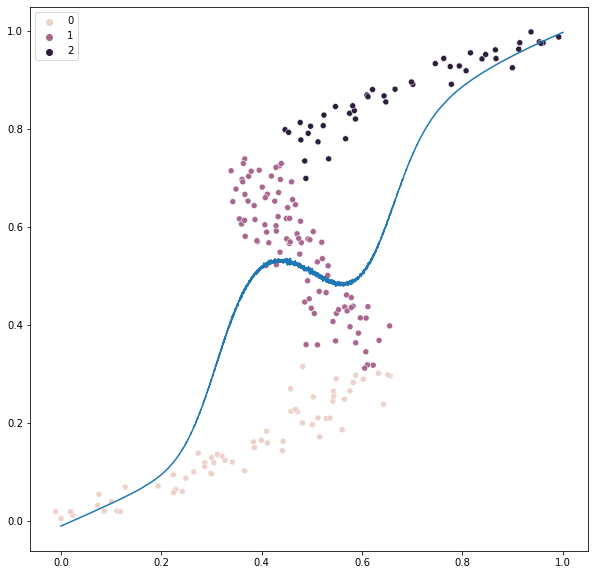

In [24]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

plt.plot(new, Y)

this is the plot for the predictive mean. it can be taken as the answer to part (a) of problem 5E